In [22]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

company = []
offer = []
price = []
car_model = []
about_car = []
previous_price = []
EMI = []
downpayment = []


for i in range(1, 21):
    URL = 'https://www.cars24.com/buy-used-cars-mumbai/?page={}'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : 'col-4'}):

        companies = x.find('div', attrs={'class' : '_1jpRU'})
        if companies is None:
            company.append(np.NaN)
        else:
            company.append(companies.text)
            
        
        about = x.find('ul', attrs={'class' : 'bVR0c'})
        if about is None:
            about_car.append(np.NaN)
        else:
            about_car.append(about.text)
            


        offers = x.find('div', attrs={'class' : '_3mZ8j'})
        if offers is None:
            offer.append(np.NaN)
        else:
            offer.append(offers.text)

        prices = x.find('div', attrs={'class' : '_7udZZ'})
        if prices is None:
            price.append(np.NaN)
        else:
            price.append(prices.text)

        previous = x.find('p', attrs={'class' : '_31Wtw'})
        if previous is None:
            previous_price.append(np.NaN)
        else:
            previous_price.append(previous.text)
        
        model = x.find('p', attrs={'class' : 'cvakB'})
        if model is None:
            car_model.append(np.NaN)
        else:
            car_model.append(model.text)
        

        payment = x.find('span', attrs={'class' : '_3X7mV _2H07I'})
        if payment is None:
            downpayment.append(np.NaN)
        else:
            downpayment.append(payment.text)
        
        
        EMIS = x.find('div', attrs={'class' : '_2HFRN'})
        if EMIS is None:
            EMI.append(np.NaN)
        else:
            EMI.append(EMIS.text)


In [2]:
print(len(company))
print(len(offer))
print(len(price))
print(len(car_model))
print(len(previous_price))
print(len(EMI))
print(len(downpayment))
print(len(about_car))

435
435
435
435
435
435
435
435


In [3]:
#Creating DtaFrame from which we scraped data
data = pd.DataFrame({'company' : company, 'car_model' : car_model, 'about_car' : about_car, 'price' : price, 'offer' : offer, 'previous_price' : previous_price, 'downpayment' : downpayment, 'EMI' : EMI})

In [4]:
#here we saving our DataFrame to csv file

#data.to_csv("cars24.csv",index=False)

In [5]:
#here we extracting data from csv file to DataFrame
df=pd.read_csv('cars24.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   company         400 non-null    object
 1   car_model       400 non-null    object
 2   about_car       400 non-null    object
 3   price           400 non-null    object
 4   offer           398 non-null    object
 5   previous_price  398 non-null    object
 6   downpayment     400 non-null    object
 7   EMI             400 non-null    object
dtypes: object(8)
memory usage: 27.6+ KB


In [7]:
df.isnull().sum()   #show null values present in all columns

company           40
car_model         40
about_car         40
price             40
offer             42
previous_price    42
downpayment       40
EMI               40
dtype: int64

In [8]:
df.dropna(axis=0,how='all',inplace=True) #if there is any rows full of null values then those rows are removed from dataframe 

In [9]:
df.isnull().sum() 

company           0
car_model         0
about_car         0
price             0
offer             2
previous_price    2
downpayment       0
EMI               0
dtype: int64

In [10]:
df.price.value_counts()

₹323,899    3
₹370,399    2
₹463,199    2
₹451,699    2
₹387,099    2
           ..
₹320,799    1
₹606,299    1
₹384,799    1
₹569,999    1
₹757,699    1
Name: price, Length: 385, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 439
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   company         400 non-null    object
 1   car_model       400 non-null    object
 2   about_car       400 non-null    object
 3   price           400 non-null    object
 4   offer           398 non-null    object
 5   previous_price  398 non-null    object
 6   downpayment     400 non-null    object
 7   EMI             400 non-null    object
dtypes: object(8)
memory usage: 28.1+ KB


In [12]:
#cleaning price column 
df['price']=df.price.apply(lambda x : x.replace('₹','') if '₹' in x else x)
df['price']=df.price.apply(lambda x:int(x.replace(',','')) if ',' in x else int(x))


In [13]:
df.price

0      307299
1      901299
2      717899
3      826399
4      850899
        ...  
435    381799
436    311699
437    387099
438    653799
439    591099
Name: price, Length: 400, dtype: int64

In [14]:
df

,company,car_model,about_car,price,offer,previous_price,downpayment,EMI
0,2009 Toyota CamryW4 AT Automatic,W4 AT Automatic,"99,864 km1st OwnerPetrol",307299,"₹5,000 OFF","₹312,299",Zero downpayment,"₹6,836/month"
1,2020 Skoda Rapid1.0 AMBITION TSI MT Manual,1.0 AMBITION TSI MT Manual,"6,981 km1st OwnerPetrol",901299,"₹5,000 OFF","₹906,299",Zero downpayment,"₹20,049/month"
2,2017 Maruti DzireZXI AMT Automatic,ZXI AMT Automatic,"92,719 km1st OwnerPetrol",717899,"₹38,000 OFF","₹755,899",Zero downpayment,"₹15,969/month"
3,2020 Hyundai VENUES MT 1.2 KAPPA Manual,S MT 1.2 KAPPA Manual,547 km1st OwnerPetrol,826399,"₹5,000 OFF","₹831,399",Zero downpayment,"₹18,383/month"
4,2018 Honda WR-V1.2 i-VTEC VX MT Manual,1.2 i-VTEC VX MT Manual,"16,631 km1st OwnerPetrol",850899,"₹31,000 OFF","₹881,899",Zero downpayment,"₹18,928/month"
...,...,...,...,...,...,...,...,...
435,2019 Renault KwidRXT Opt Manual,RXT Opt Manual,"4,523 km1st OwnerPetrol",381799,"₹29,000 OFF","₹410,799",Zero downpayment,"₹8,493/month"
436,2015 Hyundai EonERA PLUS Manual,ERA PLUS Manual,"20,419 km1st OwnerPetrol",311699,"₹17,000 OFF","₹328,699",Zero downpayment,"₹6,934/month"
437,2015 Hyundai Grand i10ASTA 1.2 VTVT Manual,ASTA 1.2 VTVT Manual,"80,058 km1st OwnerPetrol",387099,"₹19,000 OFF","₹406,099",Zero downpayment,"₹8,611/month"
438,2019 Maruti DzireVXI Manual,VXI Manual,"19,015 km1st OwnerPetrol",653799,"₹16,000 OFF","₹669,799",Zero downpayment,"₹14,543/month"


In [15]:
#cleaning 'offer' column and typecasting object to integer
df.offer.replace(to_replace=['₹',' ',',','OFF'],value="",regex=True,inplace=True)
df.offer=df['offer'].fillna(0) #
df.offer=df.offer.astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 439
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   company         400 non-null    object
 1   car_model       400 non-null    object
 2   about_car       400 non-null    object
 3   price           400 non-null    int64 
 4   offer           400 non-null    int32 
 5   previous_price  398 non-null    object
 6   downpayment     400 non-null    object
 7   EMI             400 non-null    object
dtypes: int32(1), int64(1), object(6)
memory usage: 26.6+ KB


In [17]:
df

,company,car_model,about_car,price,offer,previous_price,downpayment,EMI
0,2009 Toyota CamryW4 AT Automatic,W4 AT Automatic,"99,864 km1st OwnerPetrol",307299,5000,"₹312,299",Zero downpayment,"₹6,836/month"
1,2020 Skoda Rapid1.0 AMBITION TSI MT Manual,1.0 AMBITION TSI MT Manual,"6,981 km1st OwnerPetrol",901299,5000,"₹906,299",Zero downpayment,"₹20,049/month"
2,2017 Maruti DzireZXI AMT Automatic,ZXI AMT Automatic,"92,719 km1st OwnerPetrol",717899,38000,"₹755,899",Zero downpayment,"₹15,969/month"
3,2020 Hyundai VENUES MT 1.2 KAPPA Manual,S MT 1.2 KAPPA Manual,547 km1st OwnerPetrol,826399,5000,"₹831,399",Zero downpayment,"₹18,383/month"
4,2018 Honda WR-V1.2 i-VTEC VX MT Manual,1.2 i-VTEC VX MT Manual,"16,631 km1st OwnerPetrol",850899,31000,"₹881,899",Zero downpayment,"₹18,928/month"
...,...,...,...,...,...,...,...,...
435,2019 Renault KwidRXT Opt Manual,RXT Opt Manual,"4,523 km1st OwnerPetrol",381799,29000,"₹410,799",Zero downpayment,"₹8,493/month"
436,2015 Hyundai EonERA PLUS Manual,ERA PLUS Manual,"20,419 km1st OwnerPetrol",311699,17000,"₹328,699",Zero downpayment,"₹6,934/month"
437,2015 Hyundai Grand i10ASTA 1.2 VTVT Manual,ASTA 1.2 VTVT Manual,"80,058 km1st OwnerPetrol",387099,19000,"₹406,099",Zero downpayment,"₹8,611/month"
438,2019 Maruti DzireVXI Manual,VXI Manual,"19,015 km1st OwnerPetrol",653799,16000,"₹669,799",Zero downpayment,"₹14,543/month"


In [18]:
df['previous_price'].value_counts()

₹340,899      2
₹420,799      2
₹558,899      2
₹527,599      2
₹453,999      2
             ..
₹1,097,399    1
₹905,499      1
₹474,199      1
₹673,799      1
₹343,499      1
Name: previous_price, Length: 390, dtype: int64

In [28]:
#here we cleaning 'previous_price' column and typecasting object to integer
df['previous_price'].replace(to_replace=['₹',','],value='',regex=True,inplace=True)
df['previous_price']=df['previous_price'].fillna(0) 
df['previous_price']=df['previous_price'].astype(int)

In [29]:
df['previous_price'].value_counts()

0          2
453999     2
527599     2
420799     2
558899     2
          ..
339799     1
983899     1
500299     1
825499     1
1173099    1
Name: previous_price, Length: 391, dtype: int64

In [30]:
df['previous_price'].value_counts()

0          2
453999     2
527599     2
420799     2
558899     2
          ..
339799     1
983899     1
500299     1
825499     1
1173099    1
Name: previous_price, Length: 391, dtype: int64

In [31]:
df

,company,car_model,about_car,price,offer,previous_price,downpayment,EMI
0,2009 Toyota CamryW4 AT Automatic,W4 AT Automatic,"99,864 km1st OwnerPetrol",307299,5000,312299,Zero downpayment,"₹6,836/month"
1,2020 Skoda Rapid1.0 AMBITION TSI MT Manual,1.0 AMBITION TSI MT Manual,"6,981 km1st OwnerPetrol",901299,5000,906299,Zero downpayment,"₹20,049/month"
2,2017 Maruti DzireZXI AMT Automatic,ZXI AMT Automatic,"92,719 km1st OwnerPetrol",717899,38000,755899,Zero downpayment,"₹15,969/month"
3,2020 Hyundai VENUES MT 1.2 KAPPA Manual,S MT 1.2 KAPPA Manual,547 km1st OwnerPetrol,826399,5000,831399,Zero downpayment,"₹18,383/month"
4,2018 Honda WR-V1.2 i-VTEC VX MT Manual,1.2 i-VTEC VX MT Manual,"16,631 km1st OwnerPetrol",850899,31000,881899,Zero downpayment,"₹18,928/month"
...,...,...,...,...,...,...,...,...
435,2019 Renault KwidRXT Opt Manual,RXT Opt Manual,"4,523 km1st OwnerPetrol",381799,29000,410799,Zero downpayment,"₹8,493/month"
436,2015 Hyundai EonERA PLUS Manual,ERA PLUS Manual,"20,419 km1st OwnerPetrol",311699,17000,328699,Zero downpayment,"₹6,934/month"
437,2015 Hyundai Grand i10ASTA 1.2 VTVT Manual,ASTA 1.2 VTVT Manual,"80,058 km1st OwnerPetrol",387099,19000,406099,Zero downpayment,"₹8,611/month"
438,2019 Maruti DzireVXI Manual,VXI Manual,"19,015 km1st OwnerPetrol",653799,16000,669799,Zero downpayment,"₹14,543/month"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 439
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   company         400 non-null    object
 1   car_model       400 non-null    object
 2   about_car       400 non-null    object
 3   price           400 non-null    int64 
 4   offer           400 non-null    int32 
 5   previous_price  400 non-null    int32 
 6   downpayment     400 non-null    object
 7   EMI             400 non-null    object
dtypes: int32(2), int64(1), object(5)
memory usage: 25.0+ KB


In [33]:
#here we cleaning 'EMI' column   
df.EMI.replace(to_replace=['₹',',','/','month',],value="",regex=True,inplace=True)
df.EMI=df.EMI.astype(int)

In [34]:
 #here we renamed the column name EMI to EMI_per_month
df.rename({'EMI':'EMI_pre_month'},axis=1,inplace=True)
df.EMI_pre_month

0       6836
1      20049
2      15969
3      18383
4      18928
       ...  
435     8493
436     6934
437     8611
438    14543
439    13149
Name: EMI_pre_month, Length: 400, dtype: int32

In [35]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 439
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   company         400 non-null    object
 1   car_model       400 non-null    object
 2   about_car       400 non-null    object
 3   price           400 non-null    int64 
 4   offer           400 non-null    int32 
 5   previous_price  400 non-null    int32 
 6   downpayment     400 non-null    object
 7   EMI_pre_month   400 non-null    int32 
dtypes: int32(3), int64(1), object(4)
memory usage: 23.4+ KB


In [36]:
df

,company,car_model,about_car,price,offer,previous_price,downpayment,EMI_pre_month
0,2009 Toyota CamryW4 AT Automatic,W4 AT Automatic,"99,864 km1st OwnerPetrol",307299,5000,312299,Zero downpayment,6836
1,2020 Skoda Rapid1.0 AMBITION TSI MT Manual,1.0 AMBITION TSI MT Manual,"6,981 km1st OwnerPetrol",901299,5000,906299,Zero downpayment,20049
2,2017 Maruti DzireZXI AMT Automatic,ZXI AMT Automatic,"92,719 km1st OwnerPetrol",717899,38000,755899,Zero downpayment,15969
3,2020 Hyundai VENUES MT 1.2 KAPPA Manual,S MT 1.2 KAPPA Manual,547 km1st OwnerPetrol,826399,5000,831399,Zero downpayment,18383
4,2018 Honda WR-V1.2 i-VTEC VX MT Manual,1.2 i-VTEC VX MT Manual,"16,631 km1st OwnerPetrol",850899,31000,881899,Zero downpayment,18928
...,...,...,...,...,...,...,...,...
435,2019 Renault KwidRXT Opt Manual,RXT Opt Manual,"4,523 km1st OwnerPetrol",381799,29000,410799,Zero downpayment,8493
436,2015 Hyundai EonERA PLUS Manual,ERA PLUS Manual,"20,419 km1st OwnerPetrol",311699,17000,328699,Zero downpayment,6934
437,2015 Hyundai Grand i10ASTA 1.2 VTVT Manual,ASTA 1.2 VTVT Manual,"80,058 km1st OwnerPetrol",387099,19000,406099,Zero downpayment,8611
438,2019 Maruti DzireVXI Manual,VXI Manual,"19,015 km1st OwnerPetrol",653799,16000,669799,Zero downpayment,14543


In [37]:
#here we cleaning company column
df['year of model']=df.company.apply(lambda x:x.split()[0])
df['Brand']=df['company'].apply(lambda x : x.split() [1])

In [38]:
df['year of model']=df['year of model'].astype(int)

In [39]:
df

,company,car_model,about_car,price,offer,previous_price,downpayment,EMI_pre_month,year of model,Brand
0,2009 Toyota CamryW4 AT Automatic,W4 AT Automatic,"99,864 km1st OwnerPetrol",307299,5000,312299,Zero downpayment,6836,2009,Toyota
1,2020 Skoda Rapid1.0 AMBITION TSI MT Manual,1.0 AMBITION TSI MT Manual,"6,981 km1st OwnerPetrol",901299,5000,906299,Zero downpayment,20049,2020,Skoda
2,2017 Maruti DzireZXI AMT Automatic,ZXI AMT Automatic,"92,719 km1st OwnerPetrol",717899,38000,755899,Zero downpayment,15969,2017,Maruti
3,2020 Hyundai VENUES MT 1.2 KAPPA Manual,S MT 1.2 KAPPA Manual,547 km1st OwnerPetrol,826399,5000,831399,Zero downpayment,18383,2020,Hyundai
4,2018 Honda WR-V1.2 i-VTEC VX MT Manual,1.2 i-VTEC VX MT Manual,"16,631 km1st OwnerPetrol",850899,31000,881899,Zero downpayment,18928,2018,Honda
...,...,...,...,...,...,...,...,...,...,...
435,2019 Renault KwidRXT Opt Manual,RXT Opt Manual,"4,523 km1st OwnerPetrol",381799,29000,410799,Zero downpayment,8493,2019,Renault
436,2015 Hyundai EonERA PLUS Manual,ERA PLUS Manual,"20,419 km1st OwnerPetrol",311699,17000,328699,Zero downpayment,6934,2015,Hyundai
437,2015 Hyundai Grand i10ASTA 1.2 VTVT Manual,ASTA 1.2 VTVT Manual,"80,058 km1st OwnerPetrol",387099,19000,406099,Zero downpayment,8611,2015,Hyundai
438,2019 Maruti DzireVXI Manual,VXI Manual,"19,015 km1st OwnerPetrol",653799,16000,669799,Zero downpayment,14543,2019,Maruti


In [40]:
#here we creating 'fuel type' column in our dataframe
lst=list(df['about_car'].apply(lambda x : x.split() [2]))
l=[]
for i in lst:
    l.append(i[5:])
df['fuel type']=l  

#here we creating 'Owner' column in our dataframe
lst1=list(df['about_car'].apply(lambda x : x.split() [1]))
l2=[]
for i in lst1:
    l2.append(i[2:])
df['Owner']=l2   

#here we creating 'Kilometers' column using  'about_car' column
df['Kilometers']=df['about_car'].apply(lambda x: x.split() [0])

#here we creating 'Manual/Automatic' column using 'car_model' column
df['Manual/Automatic']=df['car_model'].apply(lambda x: x.split() [-1])

In [41]:
df

,company,car_model,about_car,price,offer,previous_price,downpayment,EMI_pre_month,year of model,Brand,fuel type,Owner,Kilometers,Manual/Automatic
0,2009 Toyota CamryW4 AT Automatic,W4 AT Automatic,"99,864 km1st OwnerPetrol",307299,5000,312299,Zero downpayment,6836,2009,Toyota,Petrol,1st,"99,864",Automatic
1,2020 Skoda Rapid1.0 AMBITION TSI MT Manual,1.0 AMBITION TSI MT Manual,"6,981 km1st OwnerPetrol",901299,5000,906299,Zero downpayment,20049,2020,Skoda,Petrol,1st,"6,981",Manual
2,2017 Maruti DzireZXI AMT Automatic,ZXI AMT Automatic,"92,719 km1st OwnerPetrol",717899,38000,755899,Zero downpayment,15969,2017,Maruti,Petrol,1st,"92,719",Automatic
3,2020 Hyundai VENUES MT 1.2 KAPPA Manual,S MT 1.2 KAPPA Manual,547 km1st OwnerPetrol,826399,5000,831399,Zero downpayment,18383,2020,Hyundai,Petrol,1st,547,Manual
4,2018 Honda WR-V1.2 i-VTEC VX MT Manual,1.2 i-VTEC VX MT Manual,"16,631 km1st OwnerPetrol",850899,31000,881899,Zero downpayment,18928,2018,Honda,Petrol,1st,"16,631",Manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2019 Renault KwidRXT Opt Manual,RXT Opt Manual,"4,523 km1st OwnerPetrol",381799,29000,410799,Zero downpayment,8493,2019,Renault,Petrol,1st,"4,523",Manual
436,2015 Hyundai EonERA PLUS Manual,ERA PLUS Manual,"20,419 km1st OwnerPetrol",311699,17000,328699,Zero downpayment,6934,2015,Hyundai,Petrol,1st,"20,419",Manual
437,2015 Hyundai Grand i10ASTA 1.2 VTVT Manual,ASTA 1.2 VTVT Manual,"80,058 km1st OwnerPetrol",387099,19000,406099,Zero downpayment,8611,2015,Hyundai,Petrol,1st,"80,058",Manual
438,2019 Maruti DzireVXI Manual,VXI Manual,"19,015 km1st OwnerPetrol",653799,16000,669799,Zero downpayment,14543,2019,Maruti,Petrol,1st,"19,015",Manual


In [42]:
#cleaning Kilometers column and typecasting object to integer
df.Kilometers.replace(to_replace=',',value="",regex=True,inplace=True)
df['Kilometers']=df['Kilometers'].astype(int)

In [43]:
df['car_model']=df['company'].apply(lambda x: " ".join(x.split()[2:]))

In [44]:
df['car_model']=df['car_model'].apply(lambda x:" ".join(x.split()[:-1]) )

In [45]:
df['Manual/Automatic'].value_counts()

Manual       306
Automatic     82
AT             4
PETROL         2
1.1            1
AMT            1
VTVT           1
1.2            1
MT             1
1.0            1
Name: Manual/Automatic, dtype: int64

In [46]:
#cleaning Manual/Automatic column 
df.replace(to_replace=['AT','PETROL','1.0','1.2','AMT','MT','VTVT','1.1'],value='Manual',regex=True,inplace=True)

In [47]:
#cleaning Downpayment column and typecasting object to integer
df.downpayment.replace(to_replace='Zero downpayment',value=0,regex=True,inplace=True)
df['downpayment']=df['downpayment'].astype(int)


In [48]:
df.head()

,company,car_model,about_car,price,offer,previous_price,downpayment,EMI_pre_month,year of model,Brand,fuel type,Owner,Kilometers,Manual/Automatic
0,2009 Toyota CamryW4 Manual Automatic,CamryW4 Manual,"99,864 km1st OwnerPetrol",307299,5000,312299,0,6836,2009,Toyota,Petrol,1st,99864,Automatic
1,2020 Skoda RapidManual AMBITION TSI Manual Manual,RapidManual AMBITION TSI Manual,"6,981 km1st OwnerPetrol",901299,5000,906299,0,20049,2020,Skoda,Petrol,1st,6981,Manual
2,2017 Maruti DzireZXI Manual Automatic,DzireZXI Manual,"92,719 km1st OwnerPetrol",717899,38000,755899,0,15969,2017,Maruti,Petrol,1st,92719,Automatic
3,2020 Hyundai VENUES Manual Manual KAPPA Manual,VENUES Manual Manual KAPPA,547 km1st OwnerPetrol,826399,5000,831399,0,18383,2020,Hyundai,Petrol,1st,547,Manual
4,2018 Honda WR-VManual i-VTEC VX Manual Manual,WR-VManual i-VTEC VX Manual,"16,631 km1st OwnerPetrol",850899,31000,881899,0,18928,2018,Honda,Petrol,1st,16631,Manual


In [49]:
#droping company column from df
df.drop('company',axis=1,inplace=True)

In [50]:
#droping about_car column from df
df.drop('about_car',axis=1,inplace=True)

In [51]:
df.head(10)

,car_model,price,offer,previous_price,downpayment,EMI_pre_month,year of model,Brand,fuel type,Owner,Kilometers,Manual/Automatic
0,CamryW4 Manual,307299,5000,312299,0,6836,2009,Toyota,Petrol,1st,99864,Automatic
1,RapidManual AMBITION TSI Manual,901299,5000,906299,0,20049,2020,Skoda,Petrol,1st,6981,Manual
2,DzireZXI Manual,717899,38000,755899,0,15969,2017,Maruti,Petrol,1st,92719,Automatic
3,VENUES Manual Manual KAPPA,826399,5000,831399,0,18383,2020,Hyundai,Petrol,1st,547,Manual
4,WR-VManual i-VTEC VX Manual,850899,31000,881899,0,18928,2018,Honda,Petrol,1st,16631,Manual
7,PoloTrendline Manual L Petrol,506499,41000,547499,0,11267,2018,Volkswagen,Petrol,1st,43686,Manual
8,Creta1.6 SX CRDI,907699,48000,955699,0,20191,2015,Hyundai,Diesel,1st,110584,Manual
9,VENUEManual TURBO GDI SX+ Manual,1081099,6000,1087099,0,24048,2019,Hyundai,Petrol,1st,26448,Automatic
10,i20 ActiveManual S,582699,23000,605699,0,12962,2017,Hyundai,Petrol,1st,57900,Manual
11,Elite i20ASTA Manual,512599,49000,561599,0,11402,2014,Hyundai,Petrol,2nd,43096,Manual


In [52]:
df.isnull().sum()

car_model           0
price               0
offer               0
previous_price      0
downpayment         0
EMI_pre_month       0
year of model       0
Brand               0
fuel type           0
Owner               0
Kilometers          0
Manual/Automatic    0
dtype: int64

In [53]:
#join
#displot
#subplot
#.........heatmap
# histogram
# kde
# pie
# bar
#...........scatter
# box(outliers)
#..........pairplot
# seaborn or plotly
#.........price,emi,dicount-kde


In [54]:
df.columns

Index(['car_model', 'price', 'offer', 'previous_price', 'downpayment',
       'EMI_pre_month', 'year of model', 'Brand', 'fuel type', 'Owner',
       'Kilometers', 'Manual/Automatic'],
      dtype='object')

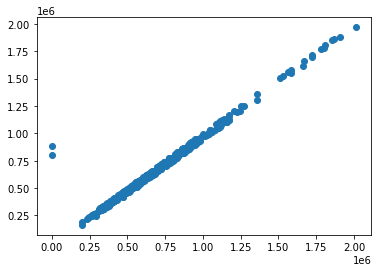

In [55]:
#Scatter
plt.scatter(df['previous_price'],df['price'])
plt.show()

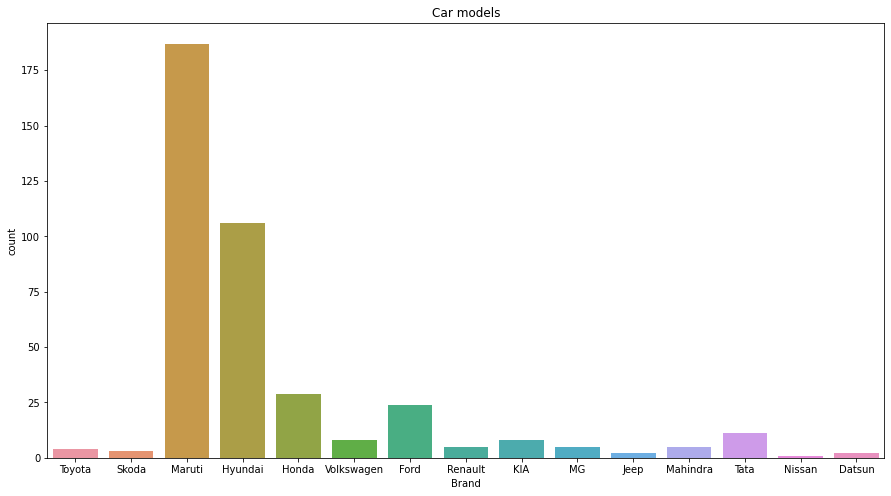

In [56]:
plt.figure(figsize=(15,8))
#plt.hist(df['Brand'],color='g')
sns.countplot(df['Brand'])
plt.title('Car models')
plt.show()

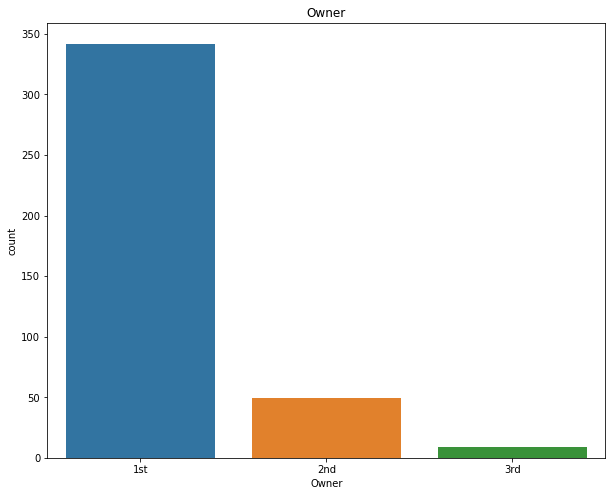

In [57]:
plt.figure(figsize=(10,8))
sns.countplot(df['Owner'])
plt.title('Owner')
plt.show()

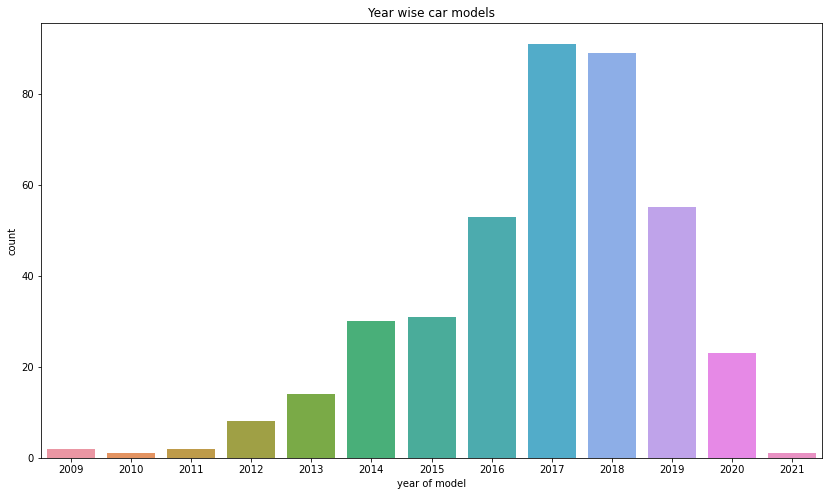

In [58]:
#ploting -on which year car models are present more in our Dataframe
plt.figure(figsize=(14,8))
sns.countplot(df['year of model'])
plt.title('Year wise car models')
plt.show()

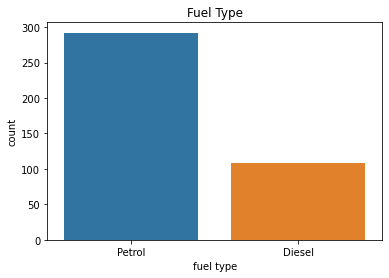

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(df['fuel type'])
plt.title('Fuel Type')
plt.show()

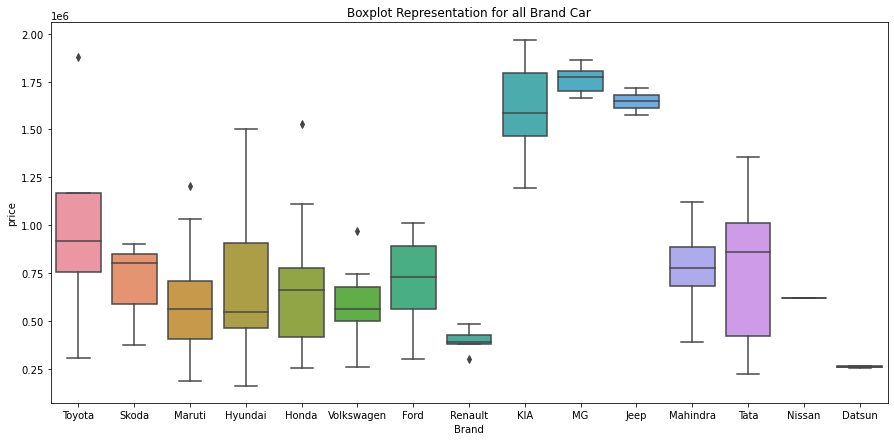

In [60]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Brand',y='price')
plt.title('Boxplot Representation for all Brand Car')
plt.show()

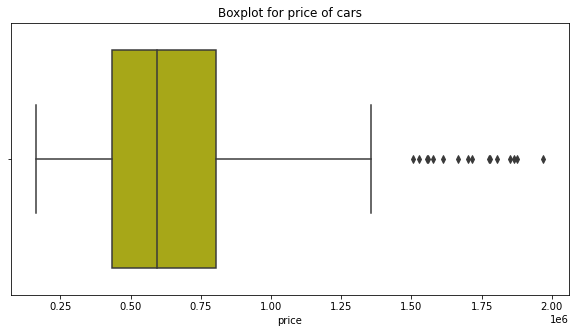

In [77]:
#from this plot we can under stand what are outliers present in 'price' column
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='price',color='y')
plt.title('Boxplot for price of cars')
plt.show()

In [61]:
df

,car_model,price,offer,previous_price,downpayment,EMI_pre_month,year of model,Brand,fuel type,Owner,Kilometers,Manual/Automatic
0,CamryW4 Manual,307299,5000,312299,0,6836,2009,Toyota,Petrol,1st,99864,Automatic
1,RapidManual AMBITION TSI Manual,901299,5000,906299,0,20049,2020,Skoda,Petrol,1st,6981,Manual
2,DzireZXI Manual,717899,38000,755899,0,15969,2017,Maruti,Petrol,1st,92719,Automatic
3,VENUES Manual Manual KAPPA,826399,5000,831399,0,18383,2020,Hyundai,Petrol,1st,547,Manual
4,WR-VManual i-VTEC VX Manual,850899,31000,881899,0,18928,2018,Honda,Petrol,1st,16631,Manual
...,...,...,...,...,...,...,...,...,...,...,...,...
435,KwidRXT Opt,381799,29000,410799,0,8493,2019,Renault,Petrol,1st,4523,Manual
436,EonERA PLUS,311699,17000,328699,0,6934,2015,Hyundai,Petrol,1st,20419,Manual
437,Grand i10ASTA Manual Manual,387099,19000,406099,0,8611,2015,Hyundai,Petrol,1st,80058,Manual
438,DzireVXI,653799,16000,669799,0,14543,2019,Maruti,Petrol,1st,19015,Manual


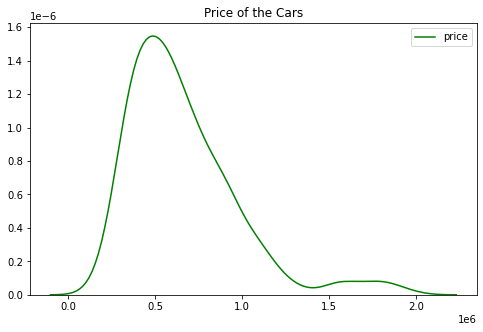

In [62]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['price'],color='g')  #offer,EMI_pre_month,Kilometers
plt.title('Price of the Cars')
plt.show()

In [63]:
# sns.displot(df['price'],kind='kde')  
# plt.show()
#price,emi,dicount

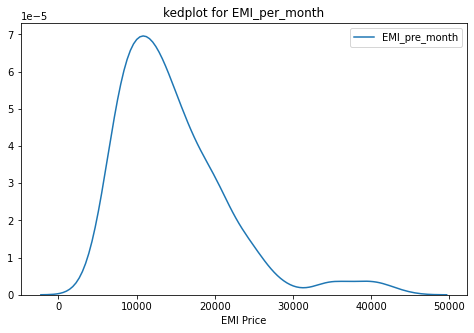

In [80]:
#most of the EMIs of cars are present in the range of 5000 to 15000 approx
plt.figure(figsize=(8,5))
sns.kdeplot(df['EMI_pre_month'])
plt.xlabel('EMI Price')
plt.title('kedplot for EMI per month' )
plt.show()

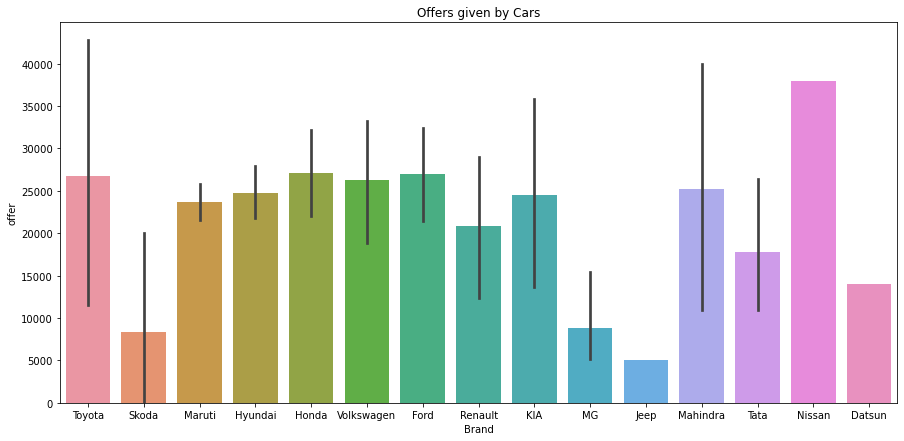

In [65]:
#here we checking which brand cars are giving maximum offer and minimum offer
plt.figure(figsize=(15,7))
sns.barplot(df['Brand'],df['offer'])
plt.title('Offers given by Cars')
plt.show()

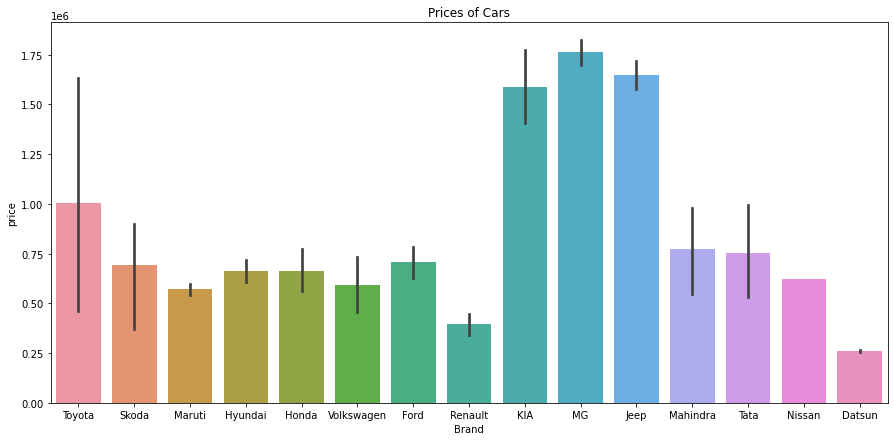

In [66]:
#from this plot we can understand that which car brand have  least prices and highest prices
plt.figure(figsize=(15,7))
sns.barplot(df['Brand'],df['price'])
plt.title('Prices of Cars')
plt.show()

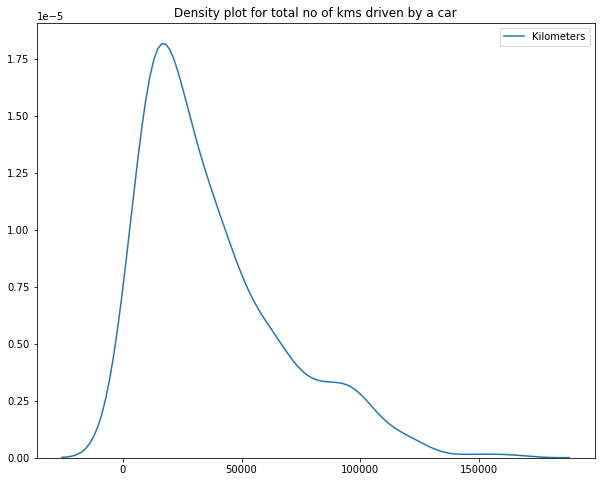

In [67]:
#from this plot we can understand that most of the cars are driven in the range of 20000 to 40000 apporx
plt.figure(figsize=(10,8))
sns.kdeplot(df['Kilometers'])
plt.title('Density plot for total no of kms driven by a car')
plt.show()

In [68]:
df

,car_model,price,offer,previous_price,downpayment,EMI_pre_month,year of model,Brand,fuel type,Owner,Kilometers,Manual/Automatic
0,CamryW4 Manual,307299,5000,312299,0,6836,2009,Toyota,Petrol,1st,99864,Automatic
1,RapidManual AMBITION TSI Manual,901299,5000,906299,0,20049,2020,Skoda,Petrol,1st,6981,Manual
2,DzireZXI Manual,717899,38000,755899,0,15969,2017,Maruti,Petrol,1st,92719,Automatic
3,VENUES Manual Manual KAPPA,826399,5000,831399,0,18383,2020,Hyundai,Petrol,1st,547,Manual
4,WR-VManual i-VTEC VX Manual,850899,31000,881899,0,18928,2018,Honda,Petrol,1st,16631,Manual
...,...,...,...,...,...,...,...,...,...,...,...,...
435,KwidRXT Opt,381799,29000,410799,0,8493,2019,Renault,Petrol,1st,4523,Manual
436,EonERA PLUS,311699,17000,328699,0,6934,2015,Hyundai,Petrol,1st,20419,Manual
437,Grand i10ASTA Manual Manual,387099,19000,406099,0,8611,2015,Hyundai,Petrol,1st,80058,Manual
438,DzireVXI,653799,16000,669799,0,14543,2019,Maruti,Petrol,1st,19015,Manual


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 439
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   car_model         400 non-null    object
 1   price             400 non-null    int64 
 2   offer             400 non-null    int32 
 3   previous_price    400 non-null    int32 
 4   downpayment       400 non-null    int32 
 5   EMI_pre_month     400 non-null    int32 
 6   year of model     400 non-null    int32 
 7   Brand             400 non-null    object
 8   fuel type         400 non-null    object
 9   Owner             400 non-null    object
 10  Kilometers        400 non-null    int32 
 11  Manual/Automatic  400 non-null    object
dtypes: int32(6), int64(1), object(5)
memory usage: 51.2+ KB


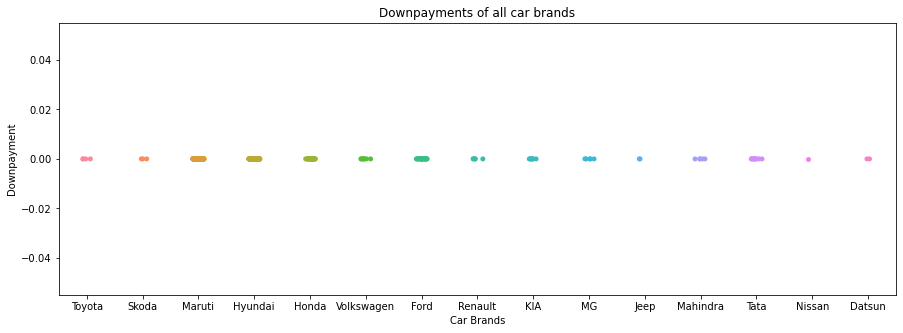

In [70]:
#From this plot we can understand that the downpayment of any car is zero. 
plt.figure(figsize=(15,5))
sns.stripplot(data=df,x='Brand',y='downpayment')
plt.xlabel('Car Brands')
plt.ylabel('Downpayment')
plt.title('Downpayments of all car brands')
plt.show()